In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,r2_score as r2,mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import statsmodels.formula.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [73]:
water = pd.read_csv('water_level.csv', delimiter = ';')
water.head()

,X,y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


In [75]:
X = pd.DataFrame(water['X'])
Y = pd.DataFrame(water['y'])

In [113]:
def error (x, y, it):
    x_ss = StandardScaler()
    y_ss = StandardScaler()
    
    x = x_ss.fit_transform(x)
    y = y_ss.fit_transform(y)
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=100)
    
    rmse_train = []
    rmse_test = []
    
    score1 = []
    score2 = []
    for i in range (1,it):
        
        poly_regressor = PolynomialFeatures(degree = i)
        X_poly_train = poly_regressor.fit_transform(xtrain)
        
        regressor = LinearRegression()
        regressor.fit(X_poly_train, ytrain)
        
        Y_hat_train = regressor.predict(X_poly_train)
        
        rmse_train.append(math.sqrt(mse(ytrain, Y_hat_train)))
        score1.append(1 - regressor.score(X_poly_train,ytrain))
        
        X_poly_test= poly_regressor.fit_transform(xtest)                  
        Y_hat_test = regressor.predict(X_poly_test)
        
        rmse_test.append(math.sqrt(mse(ytest, Y_hat_test)))
        score2.append(1 - regressor.score(X_poly_test,ytest))
        
    plt.figure(figsize=(12, 10))
    plt.plot(range(1,it), score1, color = 'darkorange')
    plt.plot(range(1,it), score2, color = 'deeppink')
    plt.show()                 
    return    

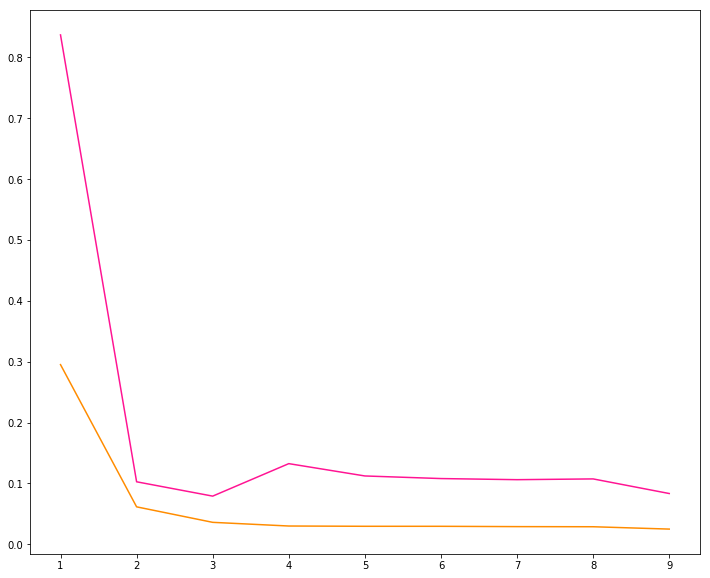

In [114]:
error (x, y, 10)

In [122]:
def rmse_error (x, y, it):
    x_ss = StandardScaler()
    y_ss = StandardScaler()
    
    x = x_ss.fit_transform(x)
    y = y_ss.fit_transform(y)
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=100)
    
    rmse_train = []
    rmse_test = []
    
    score1 = []
    score2 = []
    
    for i in range (1,it):
        
        poly_regressor = PolynomialFeatures(degree = i)
        X_poly_train = poly_regressor.fit_transform(xtrain)
        
        regressor = LinearRegression()
        regressor.fit(X_poly_train, ytrain)
        
        Y_hat_train = regressor.predict(X_poly_train)
        
        rmse_train.append(math.sqrt(mse(ytrain, Y_hat_train)))
        score1.append(1 - r2(ytrain, Y_hat_train))
        
        X_poly_test= poly_regressor.fit_transform(xtest)                  
        Y_hat_test = regressor.predict(X_poly_test)
        
        rmse_test.append(math.sqrt(mse(ytest, Y_hat_test)))
        score2.append(1 - r2(ytest, Y_hat_test))
        
    plt.figure(figsize=(12, 10))
    plt.plot(range(1,it), rmse_train, color = 'darkorange')
    plt.plot(range(1,it), rmse_test, color = 'deeppink')
    plt.show()                 
    return         

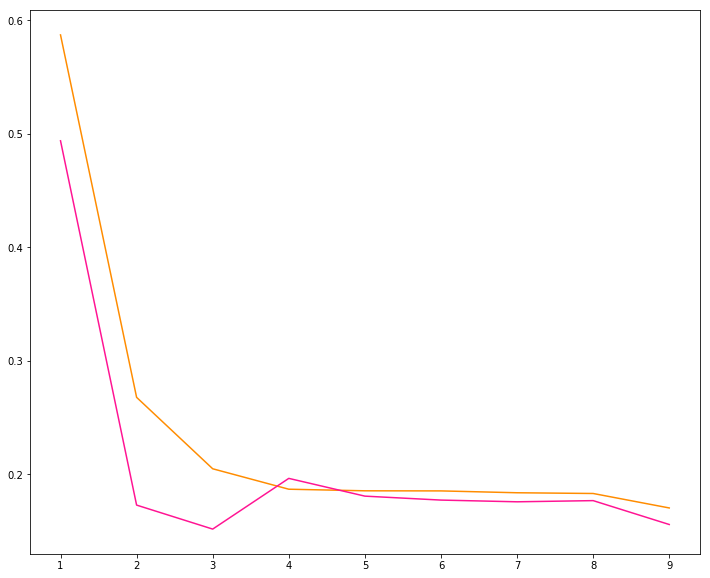

In [123]:
rmse_error(X, Y, 10)